In [102]:
#Import libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import shape
import leafmap

In [108]:
#Methods to compute area in m2, acre, ha and perimeter in metre
def add_area_m2(gdf):
    gdf['area_m2'] = ''
    for i in range(len(gdf)):
       crs = int(gdf.loc[i,'to_crs'][5:])
       gdf.set_crs(crs, allow_override=True)
       gdf.loc[i,'area_m2'] = round(shape(gdf.loc[i,'geometry']).area,2)
    return gdf

def add_area_acre(gdf):
    gdf['area_acre'] = gdf['area_m2'] * 0.000247
    return gdf

def add_area_ha(gdf):
    gdf['area_ha'] = gdf['area_acre'] * 0.4047
    return gdf

def add_perimeter(gdf):
    gdf['perimeter_m'] = ''
    for i in range(len(gdf)):
       crs = int(gdf.loc[i,'to_crs'][5:])
       gdf.set_crs(crs, allow_override=True)
       gdf.loc[i,'perimeter_m'] = round(shape(gdf.loc[i,'geometry']).length,2)
    return gdf

In [109]:
gdf = gpd.read_file('./shapes/shapes.shp')
gdf = add_area_m2(gdf)
gdf = add_area_acre(gdf)
gdf = add_area_ha(gdf)
gdf = add_perimeter(gdf)
gdf

,Country,Region,to_crs,geometry,area_m2,area_acre,area_ha,perimeter_m
0,Democratic Republic of the Congo,Équateur,epsg:4057,"POLYGON ((19.60209 5.13152, 19.61267 5.12790, ...",32.85,0.008114,0.003284,36.55
1,Democratic Republic of the Congo,Orientale,epsg:4057,"POLYGON ((25.55505 5.37646, 25.56033 5.37533, ...",40.8,0.010078,0.004078,43.02
2,Congo,Likouala,epsg:4057,"POLYGON ((17.60632 3.64125, 17.65328 3.63904, ...",5.08,0.001255,0.000508,13.38
3,Congo,Sangha,epsg:4057,"POLYGON ((16.46330 2.70887, 16.47159 2.70536, ...",4.67,0.001153,0.000467,15.0
4,USA,Sierra,epsg:26943,"MULTIPOLYGON (((-119.77867 37.46773, -119.7786...",0.58,0.000143,0.000058,6.6
5,USA,Los Padres,epsg:6423,"MULTIPOLYGON (((-120.74838 35.44383, -120.7483...",0.79,0.000195,0.000079,13.15


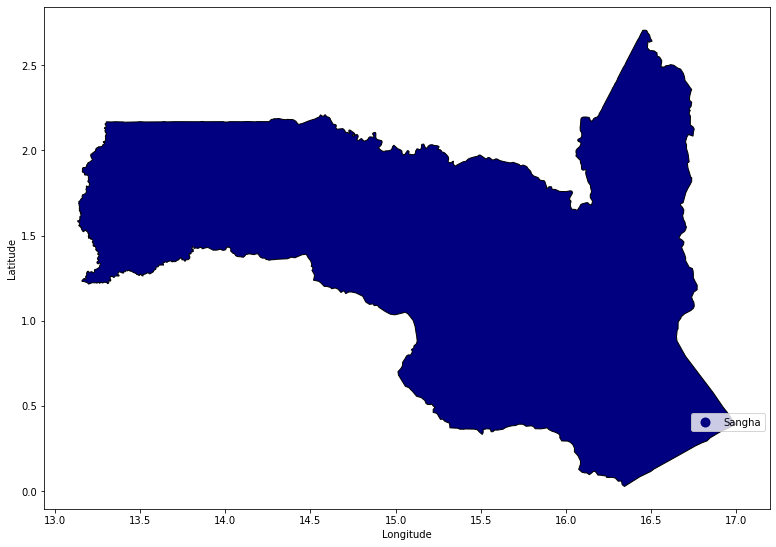

In [114]:
#PLot any of the polygons within the geodataframe
fig, ax = plt.subplots(1,figsize = (13,10))
gdf.loc[[3]].plot(ax=ax, column='Region', edgecolor='black', cmap='jet', legend=True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.2))
plt.show()